In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs and chaarts
import seaborn as sns #drawing statistical graphics
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

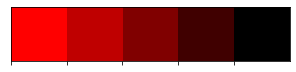

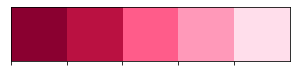

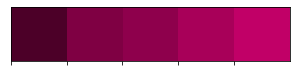

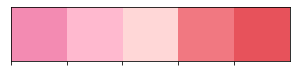

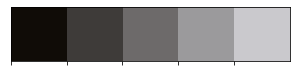

In [17]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [18]:
# --- Importing Dataset ---
gold_data = pd.read_csv("C:/Users/dell/gold price prediction/archive/gld_price_data.csv")

# --- Reading Dataset ---
gold_data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [19]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [20]:
gold_data.describe().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

SPX,GLD,USO,SLV,EUR/USD
2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
1654.315776,122.732875,31.842221,20.084997,1.283653
519.111540,23.283346,19.523517,7.092566,0.131547
676.530029,70.000000,7.960000,8.850000,1.039047
1239.874969,109.725000,14.380000,15.570000,1.171313
1551.434998,120.580002,33.869999,17.268500,1.303297
2073.010070,132.840004,37.827501,22.882500,1.369971
2872.870117,184.589996,117.480003,47.259998,1.598798


In [21]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', gold_data.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', gold_data.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
gold_data.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 2290
Total Columns: 6
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)

In [22]:
#Lets have a quick look of dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


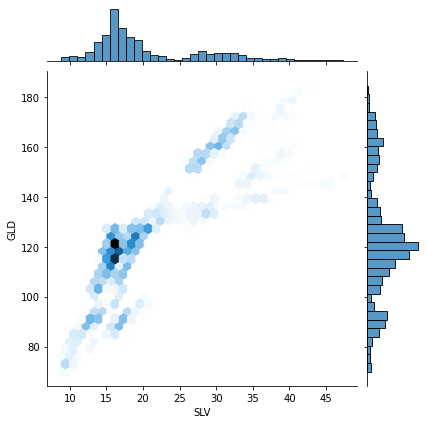

In [25]:
sns.jointplot(x='SLV',y='GLD',kind='hex',data=gold_data)

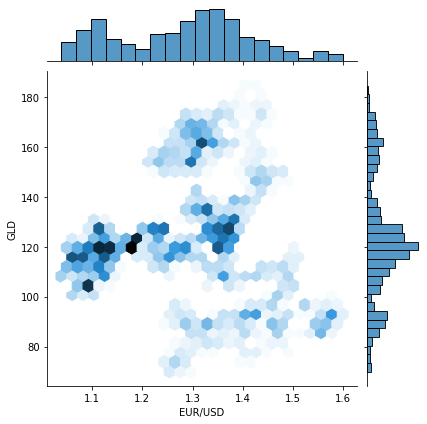

In [26]:
sns.jointplot(x='EUR/USD',y='GLD',kind='hex',data=gold_data)

<AxesSubplot:>

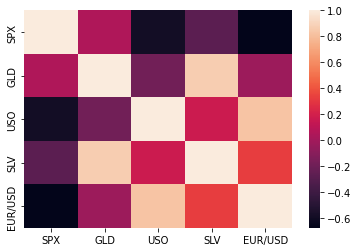

In [27]:
sns.heatmap(gold_data.corr())

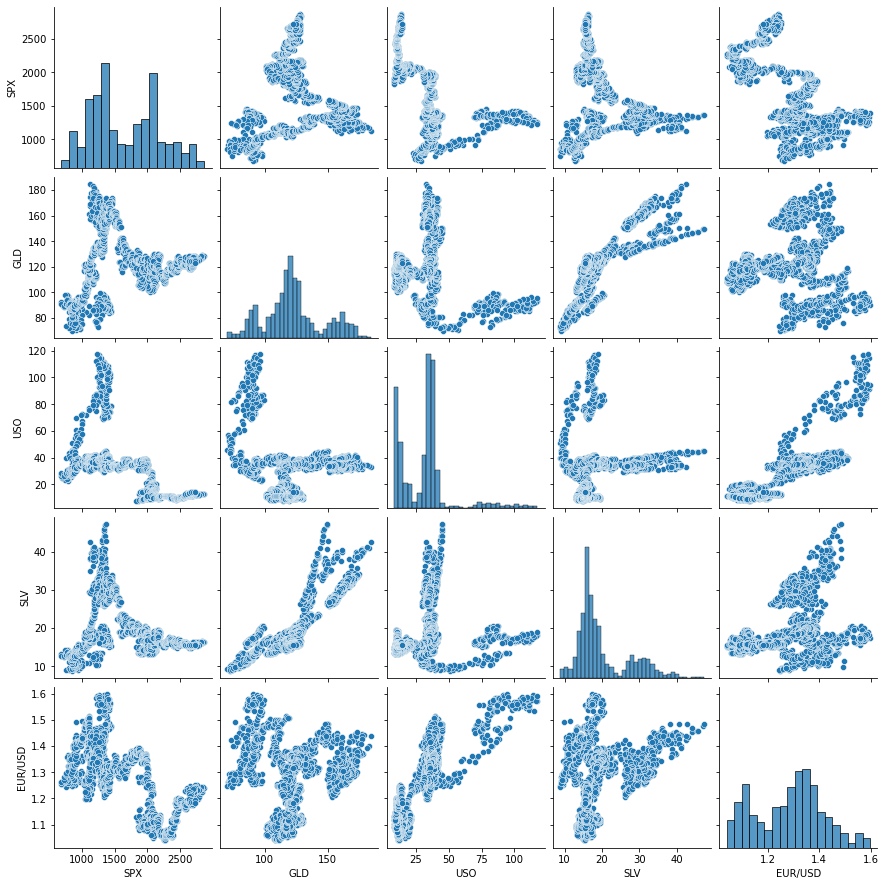

In [28]:
sns.pairplot(gold_data)

In [33]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install autoviz

Shape of your Data Set loaded: (2290, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Date,0.000000,100.000000,object,2290,0,1,"combine rare categories, possible ID column: drop"
SPX,0.000000,99.432314,float64,2277,0,0,
GLD,0.000000,84.279476,float64,1930,0,0,
USO,0.000000,66.113537,float64,1514,0,0,right skewed distribution: cap or drop outliers
SLV,0.000000,58.122271,float64,1331,0,0,right skewed distribution: cap or drop outliers
EUR/USD,0.000000,90.218341,float64,2066,0,0,


    6 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['Date']
Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


<Figure size 720x360 with 0 Axes>

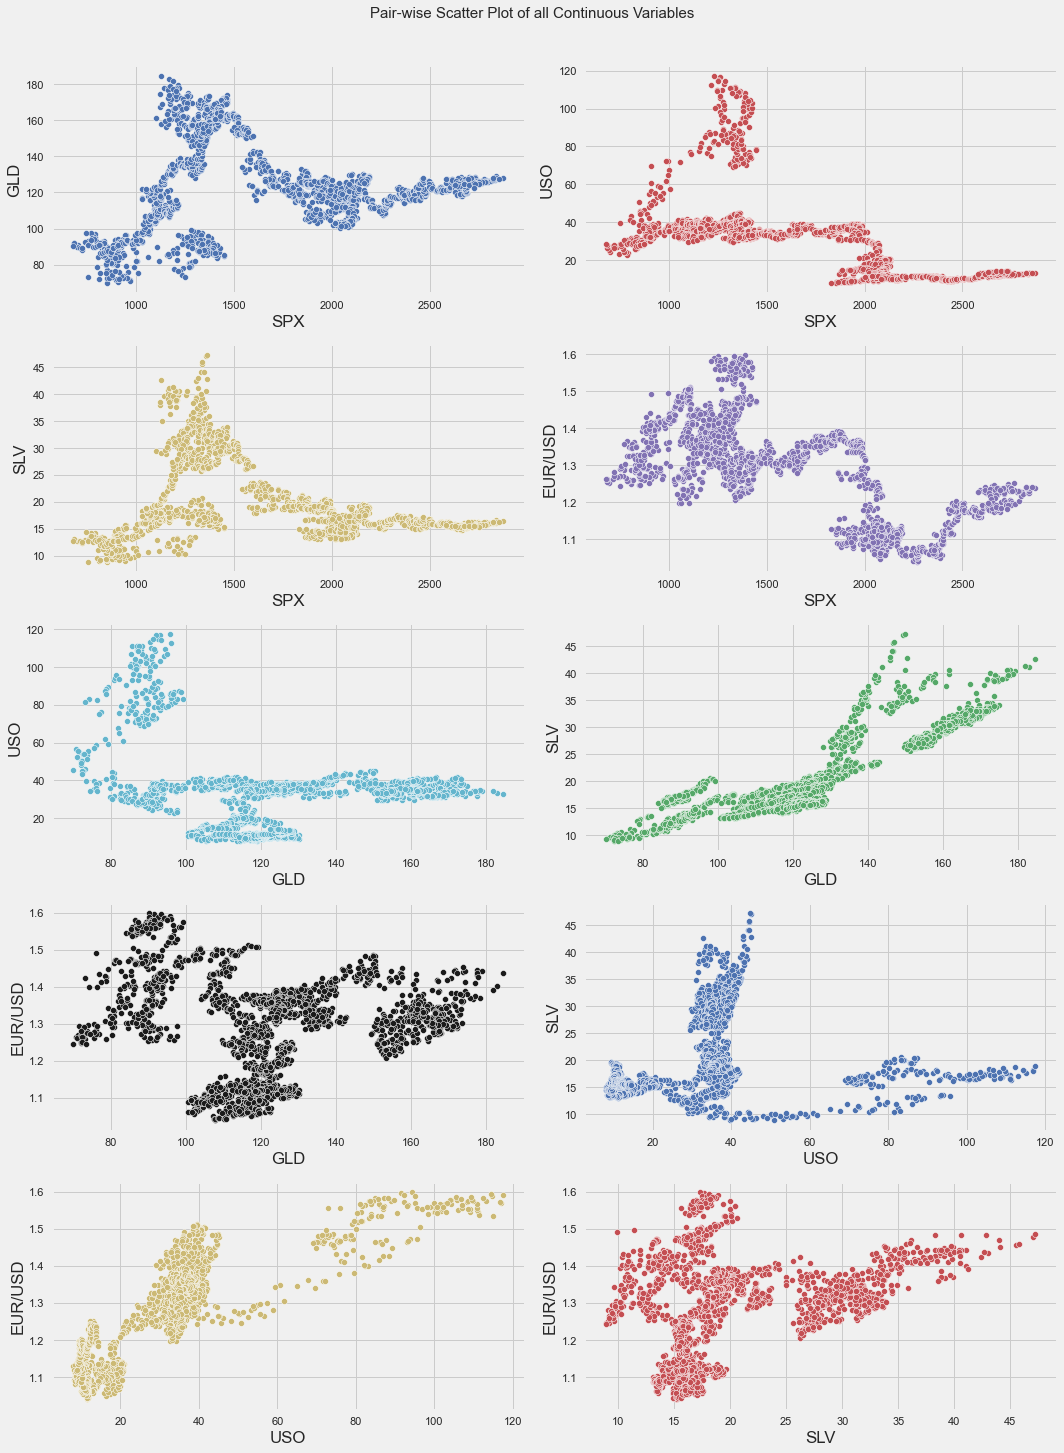

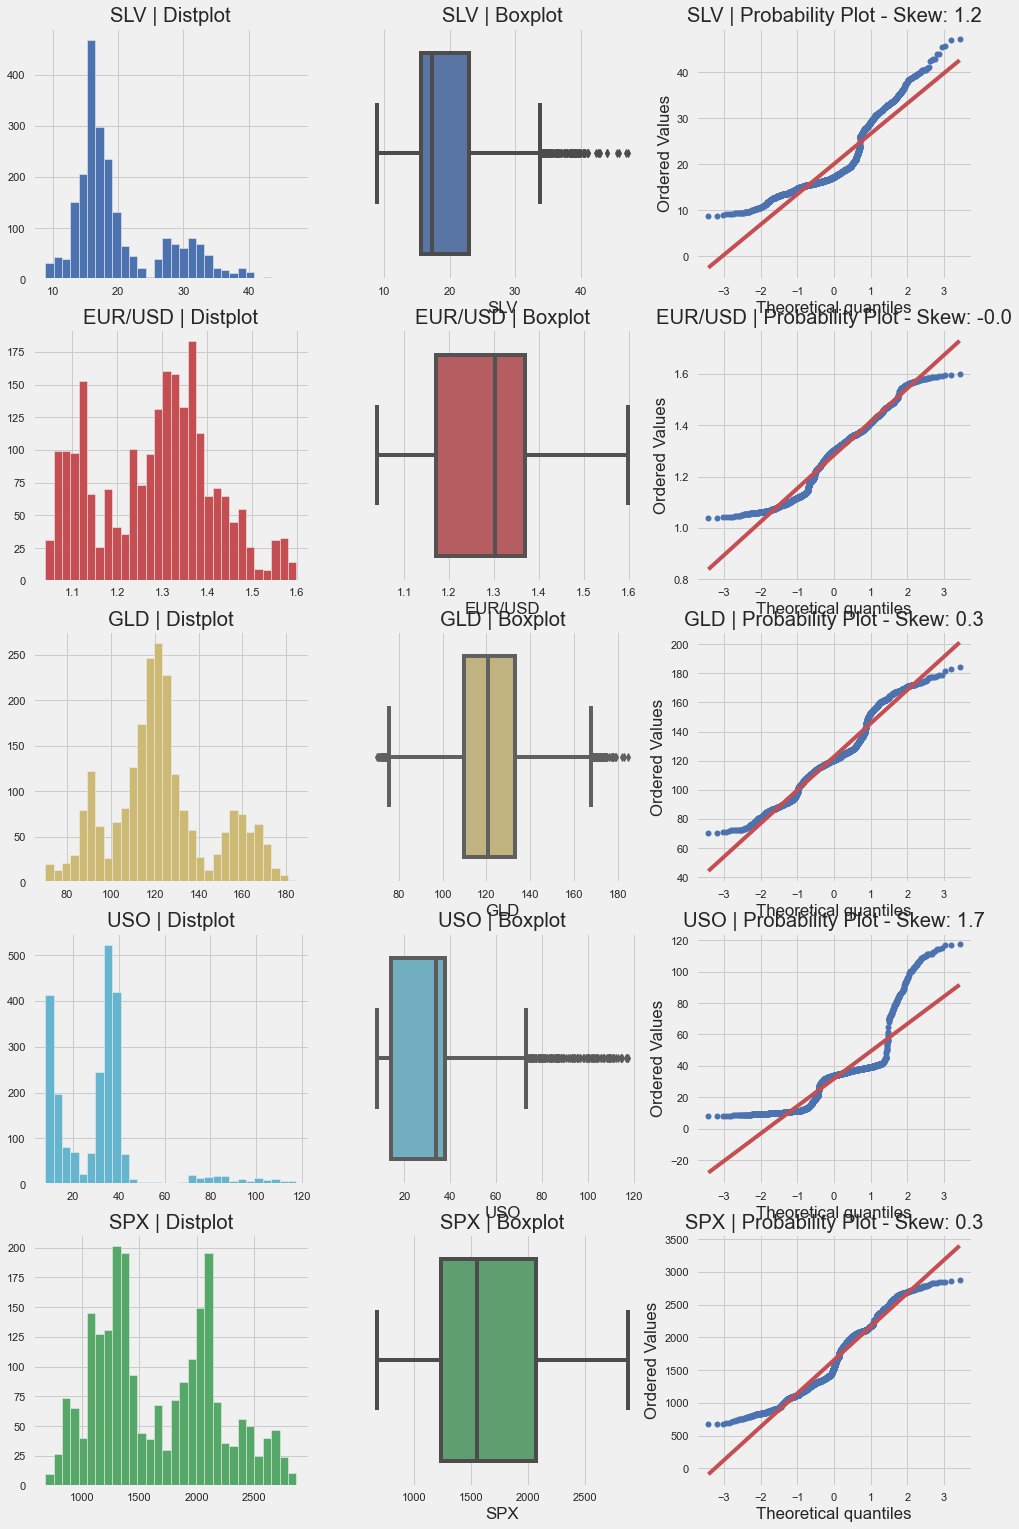

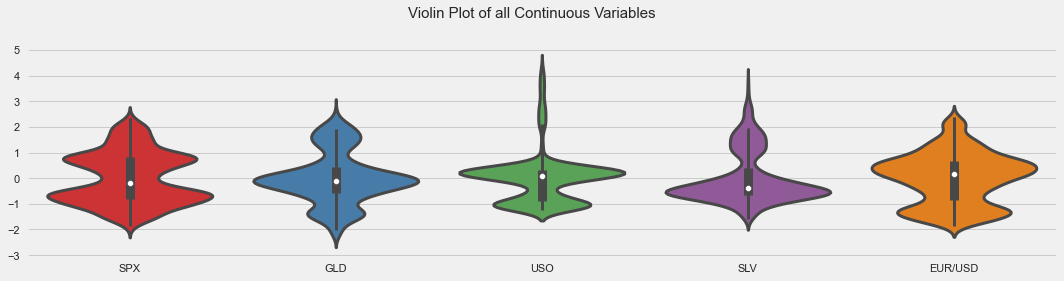

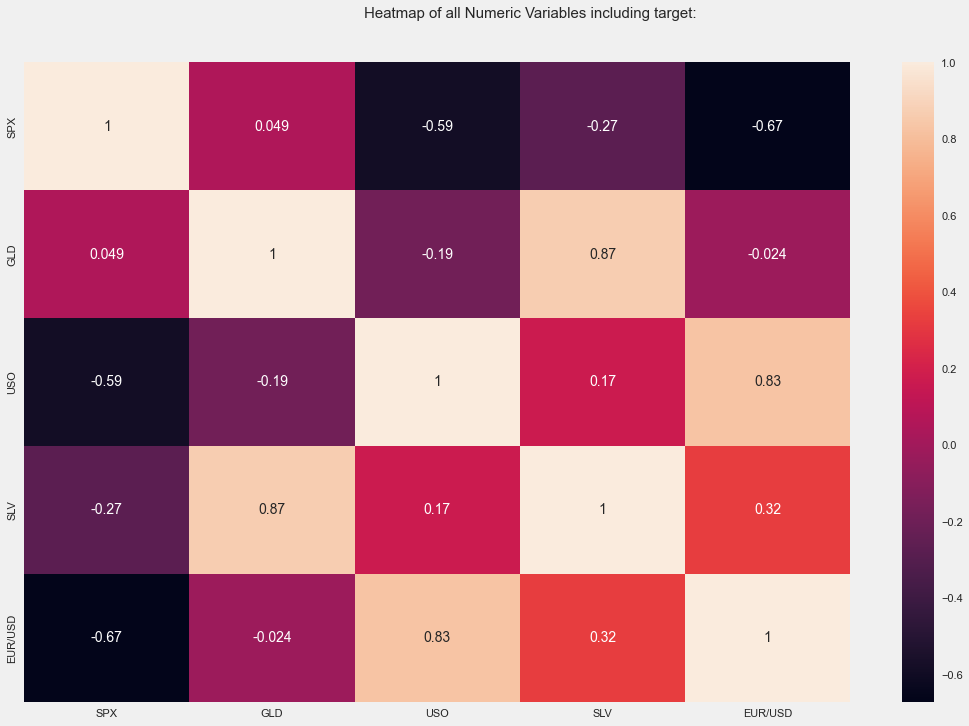

In [34]:
plt.figure(figsize = (10, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('C:/Users/dell/gold price prediction/archive/gld_price_data.csv')
plt.show()

In [35]:
correlation = gold_data.corr()


<AxesSubplot:>

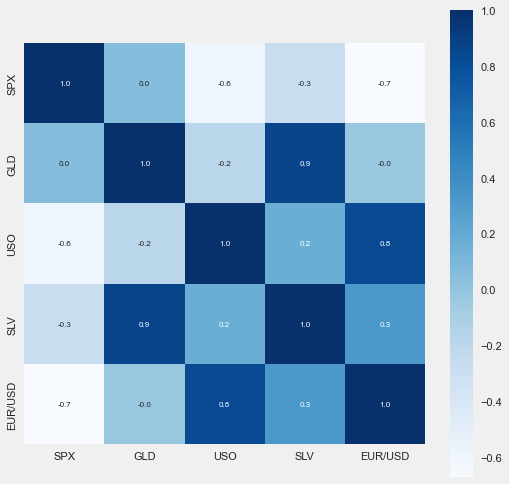

In [36]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [37]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

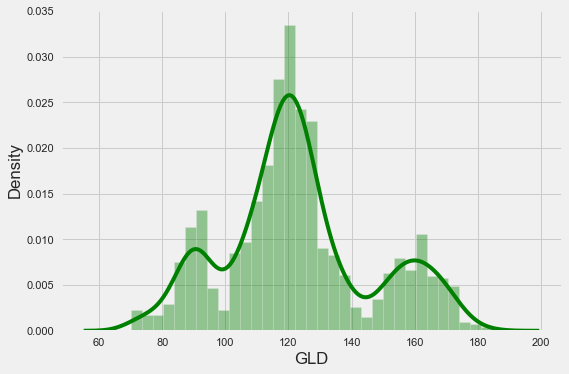

In [38]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [40]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [54]:
## MODEL IMPLEMENTATION

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
print(test_data_prediction)

[168.5949994   82.06610001 116.02829992 127.63120074 120.62970126
 154.83459765 150.6137989  126.30240008 117.48869895 126.04490089
 116.58860105 172.08340104 142.20939837 168.07429868 115.0666998
 117.4967005  139.51200319 170.06580042 159.8676031  160.86949911
 155.05930045 125.2792004  176.1432002  157.59190323 125.21020032
  93.6228995   76.95350008 120.71660004 119.07249902 167.45450132
  88.21520019 125.22350021  91.15150081 117.82229981 121.21539915
 135.88650109 115.23400144 115.20030077 146.41050033 107.21440105
 104.48280254  87.46349817 126.41130117 117.94909984 153.03449909
 119.6166002  108.45599977 108.03879782  93.20810051 127.06729781
  74.94840036 113.56749949 121.43239993 111.13819894 118.88159892
 121.04459931 159.43449949 166.9760005  147.0626968   85.92659881
  94.44850028  86.86619844  90.59030012 118.96750062 126.36110076
 127.5695     169.45669949 122.23469947 117.32389873  98.37610016
 168.47780081 143.47369906 131.88220178 121.2193024  120.93369954
 120.054500

In [47]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894510405046517


In [48]:
Y_test = list(Y_test)

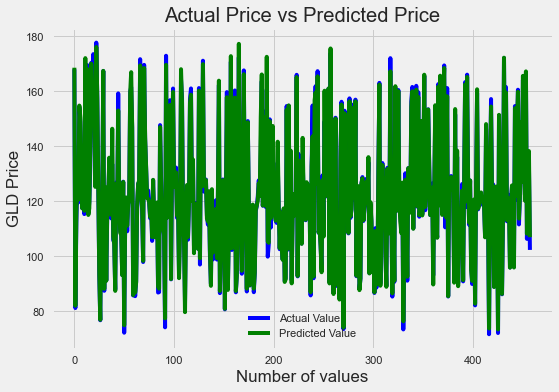

In [49]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()